# Telco Customer Churn Prediction - by Luuk Wassenaar
Date: 5 February 2023

Dataset: Telco Customer Churn

Data Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# --------------------------------------------------------------------------

### Project Description

This project will utilize several machine learning algorithms to predict customer churn for Telco. It will show the build of a function that applies and evaluates the algorithms simultanously and uses gridsearch to find the best hyper parameters for each algorithm.

### What is customer churn?
Churn in a business setting refers to losing an acquired, potentially profitable customer. The definition of churn can vary by industry ( in Healthcare, dead people are considered churn while in finance, people with inactive cards are called churned).

### Why would a business care about customer churn?
Acquiring a new customer is always more expensive than retaining an existing one. Hence, not letting them churn is the key to a sustained revenue stream.

### What are the benefits of being able to predict customer churn and how can we prevent it?
- Being able to predict customer churn means that we know which factors play a big role in the churning but also identify churning before it actually takes place. By proactively targeting these customers with, for example, loyalty programs and discounts we reduce the chances of churning and increase customer retention. In other words, improve customer experience.

- On the flip side, by predicting customer churn, companies can save money by avoiding costly marketing campaigns to retain customers who are likely to churn anyway. Companies can also use churn predictions to focus their efforts on customers who are most likely to stay with the company, and therefore generate more revenue.


# --------------------------------------------------------------------------

### Description of Features:

    - Churn: Whether the customer churned or not (Yes or No)
    - customerID: unique customer identification number 
    - gender: Whether the customer is a male or a female
    - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
    - Partner: Whether the customer has a partner or not (Yes, No)
    - Dependents: Whether the customer has dependents or not (Yes, No)
    - tenure: Number of months the customer has stayed with the company
    - PhoneService:Whether the customer has a phone service or not (Yes, No)
    - MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    - OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
    - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    - Contract: The contract term of the customer (Month-to-month, One year, Two year)
    - PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
    - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), 
      Credit card (automatic))
    - MonthlyCharges: The amount charged to the customer monthly
    - TotalCharges: The total amount charged to the customer

# --------------------------------------------------------------------------

### Data Preprocessing

#### Importing libraries:

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import decomposition
import time
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

#### Reading in Telco Customer Churn Data:

In [67]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [68]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Data Reduction - Removing customerID column from dataframe

In [71]:
data.drop(columns=['customerID'], inplace=True)

In [72]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Data Transformation - Changing categorical features into numerical features

In [73]:
data['gender'] = data['gender'].replace(['Male','Female'], [0,1])
data['Partner'] = data['Partner'].replace(['No','Yes'], [0,1])
data['Dependents'] = data['Dependents'].replace(['No','Yes'], [0,1])
data['PhoneService'] = data['PhoneService'].replace(['No','Yes'], [0,1])
data['MultipleLines'] = data['MultipleLines'].replace(['No','Yes','No phone service'], [0,1,2])
data['InternetService'] = data['InternetService'].replace(['No','Fiber optic','DSL'], [0,1,2])
data['OnlineSecurity'] = data['OnlineSecurity'].replace(['No','Yes', 'No internet service'], [0,1,2])
data['OnlineBackup'] = data['OnlineBackup'].replace(['No','Yes', 'No internet service'], [0,1,2])
data['DeviceProtection'] = data['DeviceProtection'].replace(['No','Yes', 'No internet service'], [0,1,2])
data['TechSupport'] = data['TechSupport'].replace(['No','Yes', 'No internet service'], [0,1,2])
data['StreamingTV'] = data['StreamingTV'].replace(['No','Yes', 'No internet service'], [0,1,2])
data['StreamingMovies'] = data['StreamingMovies'].replace(['No','Yes', 'No internet service'], [0,1,2])
data['Contract'] = data['Contract'].replace(['Month-to-month','One year', 'Two year'], [0,1,2])
data['PaperlessBilling'] = data['PaperlessBilling'].replace(['No','Yes'], [0,1])
data['PaymentMethod'] = data['PaymentMethod'].replace(['Electronic check','Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], [0,1,2,3])
data['Churn'] = data['Churn'].replace(['No','Yes'], [0,1])

In [74]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,2,1,0,1,1,1,1,1,1,1,84.80,1990.5,0
7039,1,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.9,0
7040,1,0,1,1,11,0,2,2,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,0,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.6,1


#### Data Cleaning - Checking for missing values

In [75]:
print(data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Initially, no NaN values were found in the data. However, some values were empty strings which is considered a missing values as well (more on this below). There are several things we can do with these missing values:
    - central tendency of the data
    - value generated through regression
    - value created by nearest neighbor algorithm
    - value created by expectations maximization algorithm

After starting the EDA process, I found something wrong with the TotalCharges column. I was not able to create a boxplot for this column.

After some research I found that various rows included empty string.

I did not want to assume that these values were zero, which is why I converted them to NaN values. 

In [76]:
data['TotalCharges'].replace(" ", np.NaN, inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)

I decided that I should remove these NaN values and with them the rows because I was not sure if these values were actually supposed to be zero. Replacing them with an algorithm might wrongfully give them higher values. Additionally, we have over 7000 rows of data, so removing a couple rows does not hurt our model.

In [77]:
print(data.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [78]:
data = data.dropna()

In [79]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,2,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,1,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,1,0,1,1,11,0,2,2,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,0,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [80]:
print(data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [81]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.615330,1.127418,0.718857,0.777162,0.776166,0.722412,0.816695,0.820677,0.688567,0.592719,1.315557,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.655867,0.737271,0.796556,0.778188,0.778542,0.795571,0.762952,0.761287,0.832934,0.491363,1.149523,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


### Exploratory Data Analysis (EDA)

# --------------------------------------------------------------------------

#### Boxplots of continous variables

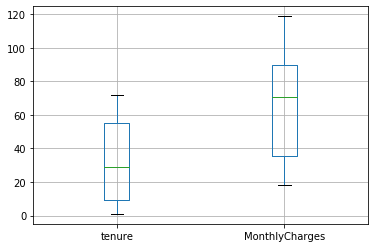

In [82]:
data.boxplot(column = ['tenure', 'MonthlyCharges'])

plt.show()

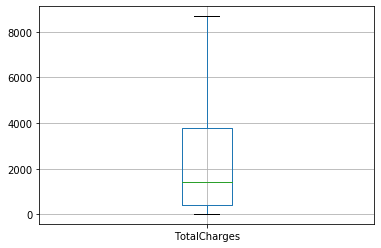

In [83]:
data.boxplot(column = ['TotalCharges'])

Based on these boxplots, we can conclude that no extreme outliers were found and for that reason we do not have to normalize these three continuous variables.

#### Investigating the Dependent Variable

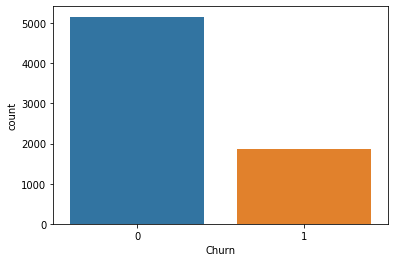

In [84]:
sns.countplot(x ='Churn',data = data)
 
# Show the plot
plt.show()

In [85]:
data['Churn'].value_counts() 

0    5163
1    1869
Name: Churn, dtype: int64

#### Class Imbalance

As can be seen from the above countplot, the data is imbalanced. 5163 are no churn, where 1869 are churn. Meaning 1869 customers stopped "doing business" with Telco. This does not have to be a problem, however it could the impact of our model accuracy in the future. The model could be biased towards predicting "no churn".

There are several ways we could 'fight' this imbalance:
    - undersampling
    - oversampling
    - weighted sampling
    - generating synthetic data

#### Undersample Data

In [86]:
#Class count
count_no_churn = 5163
count_churn = 1869

# Divide by class
df_churn_0 = data[data['Churn'] == 0]
df_churn_1 = data[data['Churn'] == 1]

print(df_churn_0)

#Randomly select  observations from the majority class
df_no_churn_subsample = df_churn_0.sample(count_churn)

# Concatenate both dataframes
df_subsample = pd.concat([df_no_churn_subsample, df_churn_1], axis=0)

#Check the class distribution
df_subsample['Churn'].value_counts()

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
3          0              0        0           0      45             0   
6          0              0        0           1      22             1   
7          1              0        0           0      10             0   
...      ...            ...      ...         ...     ...           ...   
7037       1              0        0           0      72             1   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7042       0              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 2                2     

1    1869
0    1869
Name: Churn, dtype: int64

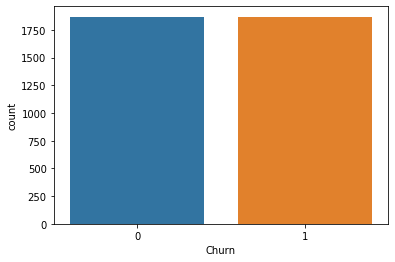

In [87]:
sns.countplot(x ='Churn',data = df_subsample)
 
# Show the plot
plt.show()

As can be seen above. We took care of the class imbalance by randomly removing "No Churn" observations. Both classes now contain 1869 samples.

In [88]:
df_subsample

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6439,1,0,1,1,35,1,0,1,1,0,1,1,1,1,0,1,0,106.90,3756.45,0
5061,1,1,1,1,55,1,1,2,1,0,1,1,1,0,1,0,0,76.25,4154.55,0
686,0,0,0,0,51,1,1,0,2,2,2,2,2,2,1,1,2,24.60,1266.40,0
5727,1,0,1,1,70,1,1,1,0,1,1,1,1,1,2,1,0,110.20,7689.80,0
3445,1,0,1,0,46,1,1,1,0,1,0,1,1,1,1,1,0,103.15,4594.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,2,0,0,0,1,1,0,1,1,0,59.80,727.80,1
7026,1,0,0,0,9,1,0,2,0,0,0,0,0,0,0,1,2,44.20,403.35,1
7032,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,75.75,75.75,1
7034,1,0,0,0,67,1,1,1,1,1,1,0,1,0,0,1,3,102.95,6886.25,1


#### Shuffle Data Frame

The code we used to downsample sorted the data. The first 1869 rows are "No Churn" observations and the last 1869 rows are "Churn" oberservations.

We need to shuffle this before we split the data into a training and test set otherwise the test set could have only one of the "Churn" observations.

In [89]:
data = df_subsample.sample(frac=1, random_state=4)

#### Looking at correlation between independent variables

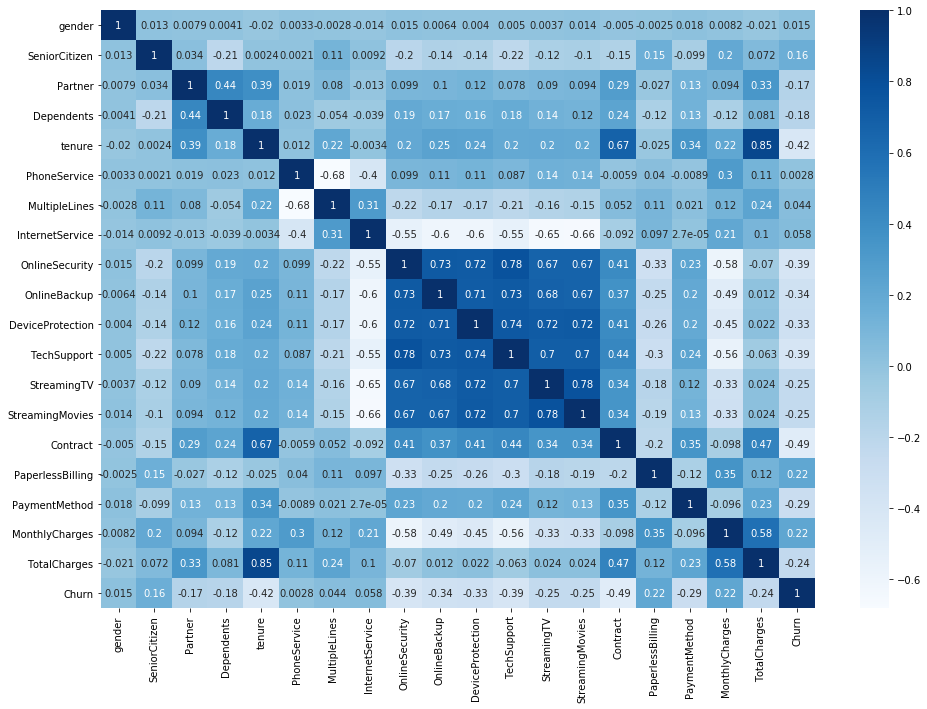

In [90]:
plt.figure(figsize=(16,11))
sns.heatmap(data.corr(), cmap="Blues", annot=True)
plt.show()

When looking at the above heatmap there are several correlation values that stand out:

- TotalCharges is highly correlated with tenure -> This makes sense because the longer you have stayed with the company the more likely you are to have spend more money for services.

- Several independent variables are highly correlated with each other (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies). It looks like customers are more likely to have several of these services if they have at least one. 

- Having InternetService is highly negatively correlated with OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. This makes sense because if you do not have internetService you will likely not have any of the other services.

- The type of contract you have is moderately to highly correlated with the tenure (months stayed with company)

We would like to remove the high correlation from our dataset. This will likely be done through Principal Component Analysis (PCA). PCA reduces the dimensionality of a data set by extracting important features that capture the majority of the variability in the data. In other words, several highly correlated features/independent variables which explain the same info about our dependent variable will be grouped. This reduces the number of dimensions, thus the number of variables.

#### Correlation between Churn and independent variables

In [91]:
corr = data.corr()

#sort the correlations
sorted_corr = corr['Churn'].sort_values(ascending=False)

#show the top 10 correlations
top_20_corr = sorted_corr[0:20]

#print out the correlations
print("Top 20 Correlations")
print(top_20_corr)

Top 20 Correlations
Churn               1.000000
MonthlyCharges      0.218500
PaperlessBilling    0.216433
SeniorCitizen       0.158910
InternetService     0.057947
MultipleLines       0.044482
gender              0.014982
PhoneService        0.002780
Partner            -0.165980
Dependents         -0.181454
TotalCharges       -0.239897
StreamingMovies    -0.246642
StreamingTV        -0.247602
PaymentMethod      -0.289546
DeviceProtection   -0.332083
OnlineBackup       -0.337506
TechSupport        -0.392434
OnlineSecurity     -0.393465
tenure             -0.415965
Contract           -0.488794
Name: Churn, dtype: float64


Based on the above rank, MonthlyCharges (0.2221) and PaperlessBilling (0.2128) have the highest positive correlation with Churn. Contract (-0.4749) and tenure (-0.4047) have the highest negative correlation with Churn.

Important to note is that correlation does not mean causation. We have to dive deeper into the relationship between the variables to find if the one variable actually affects the other variable. 

#### Further EDA

Contract Type vs Churn

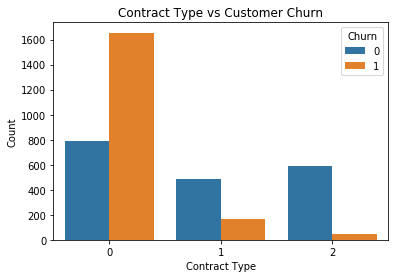

In [92]:
sns.countplot(x=data['Contract'], hue=data['Churn'])
plt.title('Contract Type vs Customer Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

As a reminder for Contract Type:
- 0 = 'Month-to-month'
- 1 = 'One year'
- 2 = 'Two year'

For Churn:
- 0 = No Churn
- 1 = Churn

With this information in mind we can take a couple of conclusions:
    - Most customers have a month-to-month contract with Telco
    - Customers who have a month-to-month contract are way more likely to Churn than customers with a longer term contract.
    - The number of customers with a month-to-month contract who churn is double the size of customers with a month-to-month contract who do not churn.

Paperless Billing vs Churn

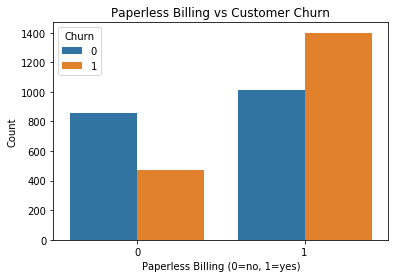

In [93]:
sns.countplot(x=data['PaperlessBilling'], hue=data['Churn'])
plt.title('Paperless Billing vs Customer Churn')
plt.xlabel('Paperless Billing (0=no, 1=yes)')
plt.ylabel('Count')
plt.show()

Paperless billing:
- 0=no
- 1=yes

Churn:
- 0=no churn
- 1=churn

Observations:
    - There are more customers who use paperless billing.
    - People who use paperless billing are more likely to churn then people who receive bills on paper.

Payment Method vs Churn

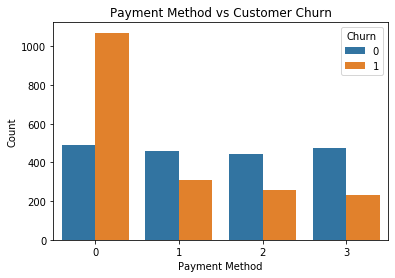

In [94]:
sns.countplot(x=data['PaymentMethod'], hue=data['Churn'])
plt.title('Payment Method vs Customer Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

Payment Method:
- 0='Electronic Check'
- 1='Mailed Check'
- 2='Bank transfer (automatic)'
- 3='Credit card (automatic)'
Churn:
- 0=no churn
- 1=churn


Observations:
    - Customers using an electronic check are more likely to churn then any of the other payment methods.
    - The distributions of using 'Mailed Check', 'Bank Transfer', and 'Credit card' are almost equal.
    - The number of customer using 'electronic check' who churn is more than double then customers using the same 
    payment method but who don't churn

InternetService vs Customer Churn

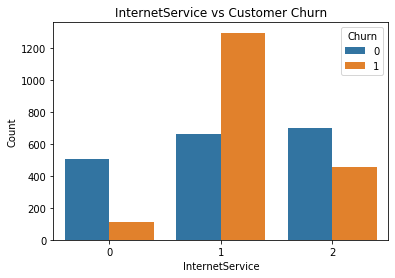

In [95]:
sns.countplot(x=data['InternetService'], hue=data['Churn'])
plt.title('InternetService vs Customer Churn')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.show()

data['OnlineSecurity'] = data['OnlineSecurity'].replace(['No','Yes', 'No internet service'], [0,1,2])

Internet Service:
- 0='No'
- 1='Yes'
- 2='No Internet Service'

Churn:
- 0=no churn
- 1=churn


Observations:
- Most customers have internet service
- Customer with internet service are twice as likely to churn then to not churn

# --------------------------------------------------------------------------

### Principal Component Analysis

As can be seen in the correlation heat map, several independent variables are moderately to highly correlated. In other words, multicollinearity in our dataset exist. We want to get rid of this multicollinearity because it affects the accuracy of our models. 

In order to take care of this multicollinearity we use Principal Component Analysis (PCA). Besides removing multicollinearity, PCA reduces the dimensions of our data. Highly correlated variables often tells us the same information about our dependent variable. These independent variables are then combined into a principal component.

Before we apply PCA we need to normalize the data. Additionally we will have to split the dependent variable 'Churn' from the rest of the data.

#### Normalize data:

In [100]:
from sklearn.preprocessing import StandardScaler

In [136]:
y = data['Churn']
X = data.drop(columns=['Churn'])

In [137]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5126,0,0,1,0,57,1,1,1,1,1,1,1,1,0,0,1,0,103.05,5925.75
1389,1,1,1,0,34,1,1,1,0,1,1,0,0,1,0,1,0,94.25,3217.55
1578,1,0,0,0,7,1,0,2,0,0,0,1,1,0,0,1,1,59.50,415.95
6600,1,0,1,1,3,0,2,2,1,0,0,0,0,0,0,0,3,29.70,91.70
4381,1,1,0,0,49,1,1,1,0,0,1,0,0,1,0,1,3,90.85,4515.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,0,70.15,268.35
2071,1,0,1,1,67,1,1,1,0,1,0,1,1,0,2,0,3,94.10,6302.80
2366,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,70.15,70.15
733,1,0,1,1,72,1,1,1,1,0,0,0,0,0,2,0,2,79.05,5730.70


In [138]:
y

5126    0
1389    1
1578    1
6600    1
4381    1
       ..
220     1
2071    0
2366    1
733     0
3828    0
Name: Churn, Length: 3738, dtype: int64

Text(0.5, 1.0, "Variance Explained by PCA's")

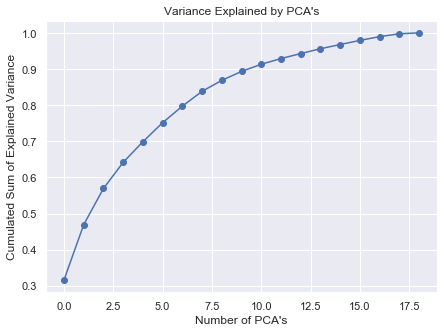

In [140]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of PCA 
pca = sklearn.decomposition.PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)

ratios = pca.explained_variance_ratio_

# Plot the explained variance ratios
x = np.arange(X_scaled.shape[1])
plt.plot(x, np.cumsum(ratios), '-o')
plt.xlabel("Number of PCA's")
plt.ylabel("Cumulated Sum of Explained Variance")
plt.title("Variance Explained by PCA's")

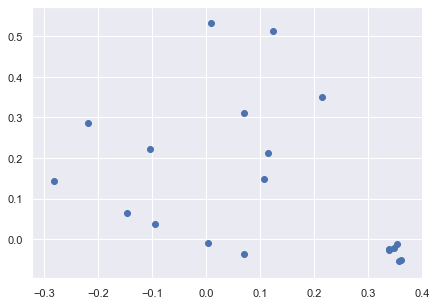

In [145]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of PCA 
pca = sklearn.decomposition.PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)

pca = PCA(n_components=14)
pca.fit(X_scaled)

eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

import matplotlib.pyplot as plt
plt.scatter(eigenvectors[0], eigenvectors[1])
plt.show()

In [146]:
#calculate the variance explained by the principal components 
variance_explained = pca.explained_variance_ratio_ 

#print the variance explained by the principal components 
print("Variance explained:", variance_explained)

Variance explained: [0.31617735 0.15310411 0.09999111 0.07243389 0.05698458 0.05281025
 0.0456493  0.04107666 0.03029033 0.02476863 0.01988255 0.0156413
 0.01393634 0.01330788]


There are several methods to pick the number of components. I use a combination of the elbow method while also looking at the total variance I want to explain. Since I want to at least 95% of variance explained, I use 14 components.

In [147]:
pca = PCA(n_components=14)
X_pca = pca.fit_transform(X_scaled)

# --------------------------------------------------------------------------

### Split Data Into Train and Test Set

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# --------------------------------------------------------------------------

### Classification Model Prediction Function

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [151]:
def classification_model_prediction(X, y, test_size, random_state):
    
    # Function splits data into train and test sets and returns them to this main function
    X_train, X_test, y_train, y_test = split_data(X, y, test_size, random_state=0)
    
    # Function creates dictionary with information on classifiers and their parameters
    classifiers = set_classifiers()
    
    # function uses GridSearchCV to find best hyperparameter values for each classification algorithm
    best_models = param_tuning(classifiers, X_train, X_test, y_train, y_test)
    
    print(best_models)

In [152]:
def split_data(X, y, test_size, random_state=0):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    return X_train, X_test, y_train, y_test

In [182]:
def set_classifiers():
    
    LR_params = {'penalty':['l2'],
                'C':[0.001,0.01,0.1,1,10,100,1000]}
    
    DT_params = {'min_samples_leaf': [1,2,3,4,5], 
                 'max_depth': [1,2,4,5,8,10,20], 
                 'max_features': [1,2,3], 
                 'criterion': ['gini','entropy']}
    
    RF_params = {'max_depth': [1,2,3,4,5,10],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [50, 100, 200, 500]}
    
    AB_params = {'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
                 'n_estimators': [200, 400, 600, 800, 1000]}
    
    SVM_params = {'C':[0.01,0.1,1],
                  'kernel' : ["linear","poly","rbf","sigmoid"],
                  'degree' : [1,3,5],
                  'gamma' : ["auto"]}
    
    NB_params = {}
                  
    KNN_params = {'weights': ['distance', 'uniform'],
                  'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20]}
    
    
    classifiers = [('LR', LogisticRegression(), LR_params),
                   ('DT', DecisionTreeClassifier(), DT_params),
                   ('RF', RandomForestClassifier(), RF_params),
                   ('AB', AdaBoostClassifier(), AB_params),
                   ('KNN', KNeighborsClassifier(), KNN_params),
                   ('SVM', SVC(), SVM_params),
                   ('NB', GaussianNB(), NB_params)]
                   
    return classifiers

In [191]:
def param_tuning(classifiers, X_train, X_test, y_train, y_test):
    
    best_models = {}
    for name, classifier, params in classifiers:
        
        start_time = time.time()

        print(f"{name} GridSearch in progress...")
        best_params = GridSearchCV(classifier, params, cv=5, verbose=False, scoring='accuracy')
        best_params.fit(X_train, y_train)
        print('Best parameters:', best_params.best_params_)
        
        final_model = classifier.set_params(**best_params.best_params_)
        
        stop_time = time.time()
        running_time = stop_time - start_time
        print(f'Running time: {running_time}')
        best_models[name] = final_model
        
    return best_models

In [192]:
classification_model_prediction(X_pca, y, 0.10, random_state=0)

LR GridSearch in progress...
Best parameters: {'C': 1, 'penalty': 'l2'}
Running time: 0.2923436164855957
DT GridSearch in progress...
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 4}
Running time: 4.974975109100342
RF GridSearch in progress...
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Running time: 696.3665208816528
AB GridSearch in progress...
Best parameters: {'learning_rate': 0.4, 'n_estimators': 200}
Running time: 767.7912311553955
KNN GridSearch in progress...
Best parameters: {'n_neighbors': 20, 'weights': 'uniform'}
Running time: 3.120448112487793
SVM GridSearch in progress...
Best parameters: {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Running time: 46.67915606498718
NB GridSearch in progress...
Best parameters: {}
Running time: 0.014417886734008789
{'LR': LogisticRegression(C=1), 'DT': DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=3

# --------------------------------------------------------------------------

## Model Performance without PCA

In [229]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [243]:
# Final model
print(f'Logistic Regression:')
final_model = LogisticRegression(C = 1, penalty = 'l2', max_iter=1000)
final_model.fit(X_train, y_train)

# Train Accuracy
y_train_pred = final_model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Train: {acc_train}')

# Test Accuracy
y_test_pred = final_model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Test: {acc_test}')

Logistic Regression:
Accuracy Train: 0.7642140468227425
Accuracy Test: 0.7473262032085561


#### Feature Importance

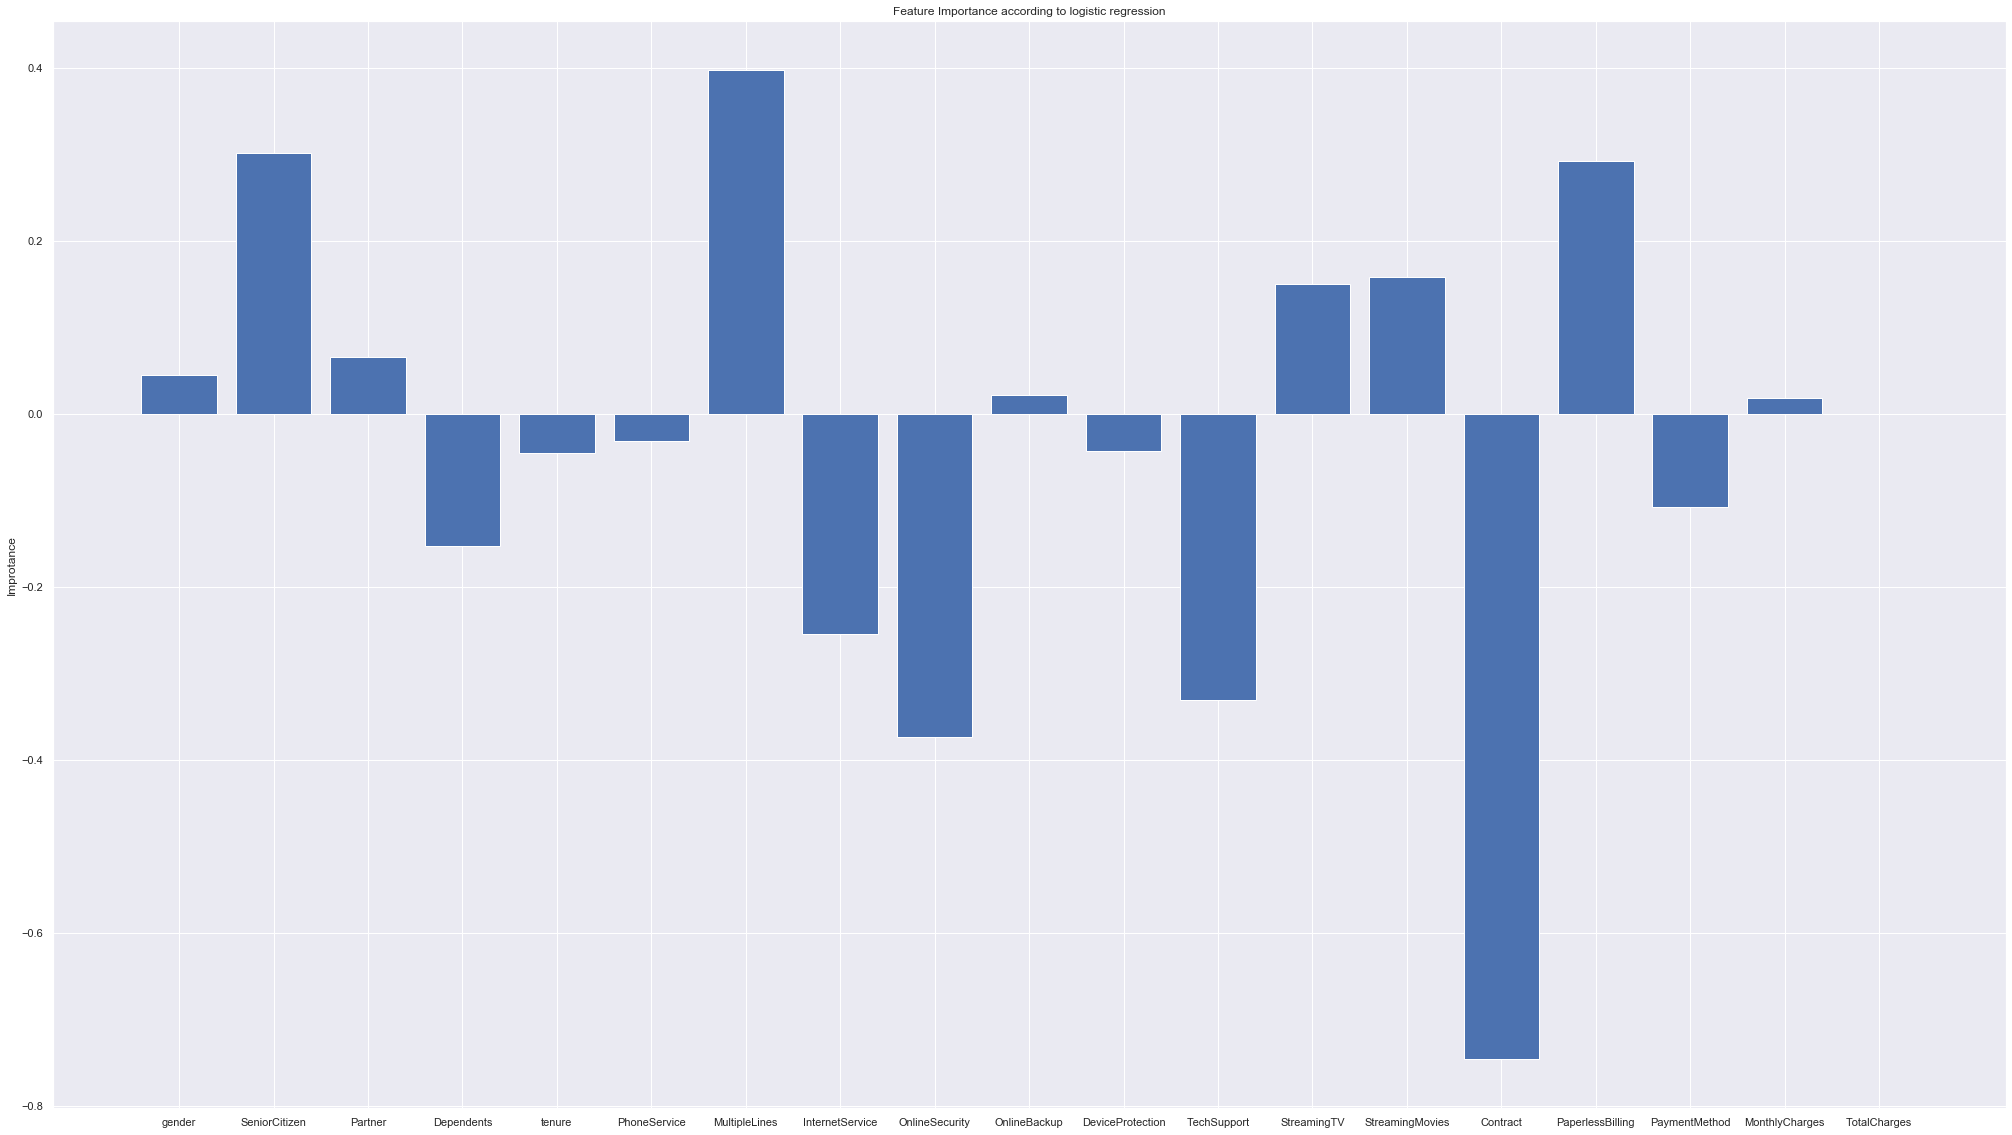

In [244]:
features = X_train.columns
importance = final_model.coef_[0]

fig = plt.figure(figsize=(35, 20))
plt.bar(features, importance)
plt.title("Feature Importance according to logistic regression")
plt.ylabel("Improtance")
plt.show()

Most Important features:
- Multiplelines
- PaperlessBilling
- SeniorCitizen
- StreamingMovies
- StreamingTV

Least Important features:
- Contract
- OnlineSecurity
- Techsupport
- InternetService
- Dependents

# --------------------------------------------------------------------------

## Model Performance with PCA

#### Split data

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

#### Building Confusion Matrix

In [193]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    sns.set(rc = {'figure.figsize':(7, 5)})
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

##############################################################################################################

### Logistic Regression Model Performance

##############################################################################################################

In [194]:
# Final model
print(f'Logistic Regression:')
final_model = LogisticRegression(C = 1, penalty = 'l2')
final_model.fit(X_train, y_train)

# Train Accuracy
y_train_pred = final_model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Train: {acc_train}')

# Test Accuracy
y_test_pred = final_model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Test: {acc_test}')

Logistic Regression:
Accuracy Train: 0.7652173913043478
Accuracy Test: 0.7526737967914439


Logistic Regression Classifier Confusion Matrix for Train Set:


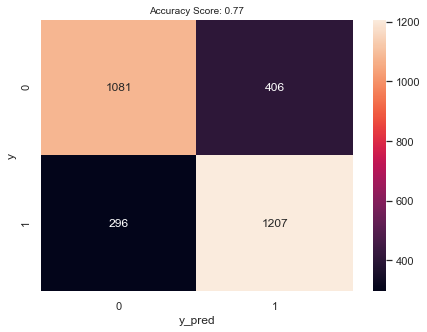

In [195]:
print(f'Logistic Regression Classifier Confusion Matrix for Train Set:')
plot_confusion_matrix(y_train, y_train_pred)

Logistic Regression Classifier Confusion Matrix for Test Set:


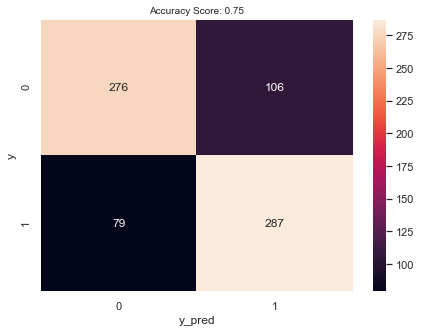

In [196]:
print(f'Logistic Regression Classifier Confusion Matrix for Test Set:')
plot_confusion_matrix(y_test, y_test_pred)

In [197]:
print(f'Logistic Regression Classification report for Test Set:')
print(classification_report(y_test, y_test_pred))

Logistic Regression Classification report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       382
           1       0.73      0.78      0.76       366

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



##############################################################################################################

### Decision Tree Classifier Model Performance

##############################################################################################################

In [198]:
# Final model
print(f'Decision Tree Classifier:')
final_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, max_features= 3, min_samples_leaf = 4)
final_model.fit(X_train, y_train)

# Train Accuracy
y_train_pred = final_model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Train: {acc_train}')

# Test Accuracy
y_test_pred = final_model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Test: {acc_test}')

Decision Tree Classifier:
Accuracy Train: 0.8023411371237458
Accuracy Test: 0.7125668449197861


Decision Tree Classifier Confusion Matrix for Train Set:


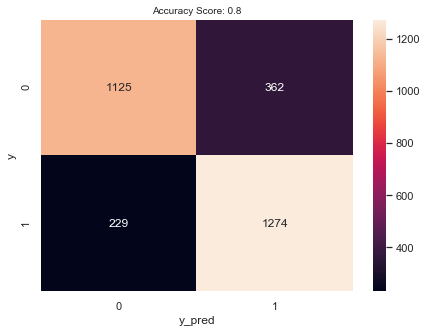

In [199]:
print(f'Decision Tree Classifier Confusion Matrix for Train Set:')
plot_confusion_matrix(y_train, y_train_pred)

Decision Tree Classifier Confusion Matrix for Test Set:


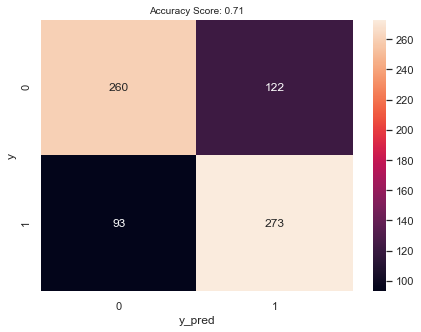

In [200]:
print(f'Decision Tree Classifier Confusion Matrix for Test Set:')
plot_confusion_matrix(y_test, y_test_pred)

In [201]:
print(f'Decision Tree Classification report for Test Set:')
print(classification_report(y_test, y_test_pred))

Decision Tree Classification report for Test Set:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       382
           1       0.69      0.75      0.72       366

    accuracy                           0.71       748
   macro avg       0.71      0.71      0.71       748
weighted avg       0.71      0.71      0.71       748



##############################################################################################################

### Random Forest Classifier Model Performance

##############################################################################################################

In [202]:
# Final model
print(f'Random Forest Classifier:')
final_model = RandomForestClassifier(max_depth= 5, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200)
final_model.fit(X_train, y_train)

# Train Accuracy
y_train_pred = final_model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Train: {acc_train}')

# Test Accuracy
y_test_pred = final_model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Test: {acc_test}')

Random Forest Classifier:
Accuracy Train: 0.7909698996655519
Accuracy Test: 0.75


Random Forest Classifier Confusion Matrix for Train Set:


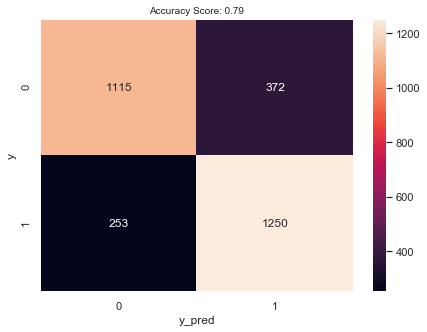

In [203]:
print(f'Random Forest Classifier Confusion Matrix for Train Set:')
plot_confusion_matrix(y_train, y_train_pred)

Random Forest Classifier Confusion Matrix for Test Set:


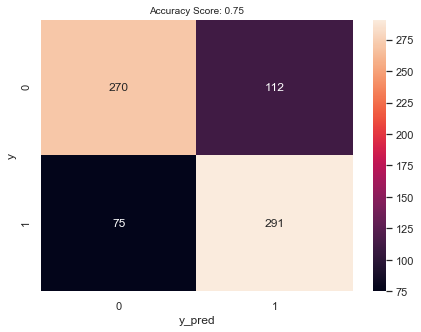

In [204]:
print(f'Random Forest Classifier Confusion Matrix for Test Set:')
plot_confusion_matrix(y_test, y_test_pred)

In [205]:
print(f'Random Forest Classification report for Test Set:')
print(classification_report(y_test, y_test_pred))

Random Forest Classification report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       382
           1       0.72      0.80      0.76       366

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



##############################################################################################################

### AdaBoost Classifier Classifier Model Performance

##############################################################################################################

In [206]:
# Final model
print(f'AdaBoost Classifier:')
final_model = AdaBoostClassifier(learning_rate= 0.4, n_estimators= 200)
final_model.fit(X_train, y_train)

# Train Accuracy
y_train_pred = final_model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Train: {acc_train}')

# Test Accuracy
y_test_pred = final_model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Test: {acc_test}')

AdaBoost Classifier:
Accuracy Train: 0.7953177257525084
Accuracy Test: 0.7526737967914439


Adaboost Classifier Confusion Matrix for Train Set:


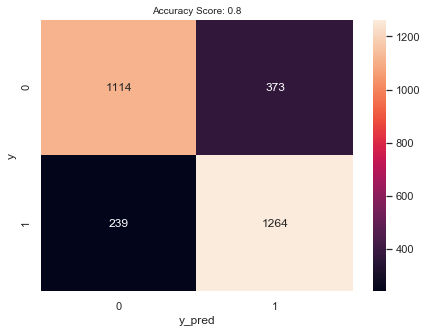

In [207]:
print(f'Adaboost Classifier Confusion Matrix for Train Set:')
plot_confusion_matrix(y_train, y_train_pred)

Adaboost Classifier Confusion Matrix for Test Set:


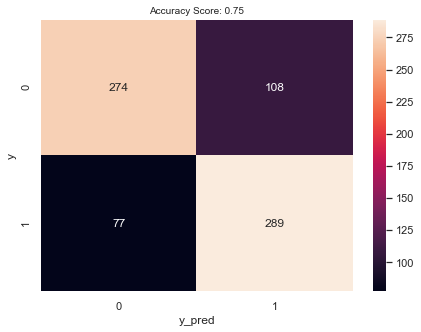

In [208]:
print(f'Adaboost Classifier Confusion Matrix for Test Set:')
plot_confusion_matrix(y_test, y_test_pred)

In [209]:
print(f'Adaboost Classification report for Test Set:')
print(classification_report(y_test, y_test_pred))

Adaboost Classification report for Test Set:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       382
           1       0.73      0.79      0.76       366

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



##############################################################################################################

### K-Nearest Neighbor Model Performance

##############################################################################################################

In [210]:
# Final model
print(f'KNN:')
final_model = KNeighborsClassifier(n_neighbors= 20, weights= 'uniform')
final_model.fit(X_train, y_train)

# Train Accuracy
y_train_pred = final_model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Train: {acc_train}')

# Test Accuracy
y_test_pred = final_model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Test: {acc_test}')

KNN:
Accuracy Train: 0.7752508361204014
Accuracy Test: 0.7259358288770054


KNN Confusion Matrix for Train Set:


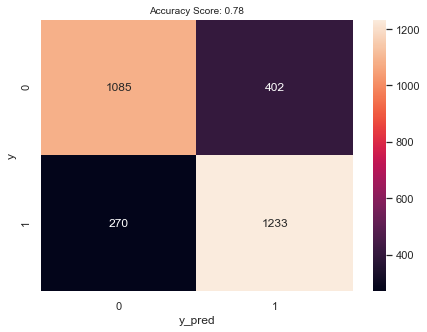

In [211]:
print(f'KNN Confusion Matrix for Train Set:')
plot_confusion_matrix(y_train, y_train_pred)

KNN Confusion Matrix for Test Set:


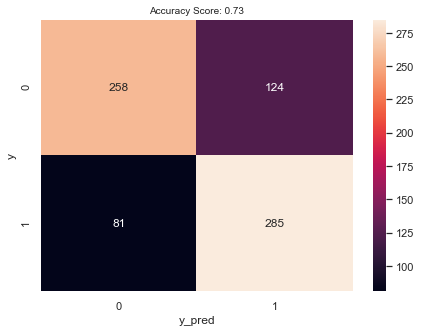

In [212]:
print(f'KNN Confusion Matrix for Test Set:')
plot_confusion_matrix(y_test, y_test_pred)

In [213]:
print(f'KNN Classification report for Test Set:')
print(classification_report(y_test, y_test_pred))

KNN Classification report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       382
           1       0.70      0.78      0.74       366

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



##############################################################################################################

### Support Vector Machine Model Performance

##############################################################################################################

In [214]:
# Final model
print(f'SVM:')
final_model = SVC(C= 1, degree= 1, gamma= 'auto', kernel= 'rbf')
final_model.fit(X_train, y_train)

# Train Accuracy
y_train_pred = final_model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Train: {acc_train}')

# Test Accuracy
y_test_pred = final_model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Test: {acc_test}')

SVM:
Accuracy Train: 0.794314381270903
Accuracy Test: 0.7352941176470589


Support Vector Machine Confusion Matrix for Train Set:


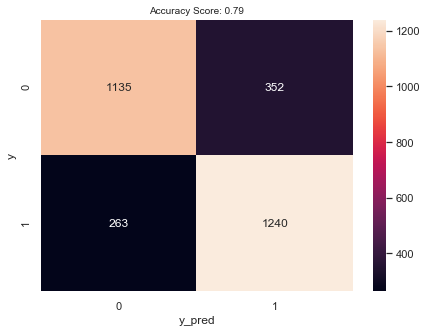

In [215]:
print(f'Support Vector Machine Confusion Matrix for Train Set:')
plot_confusion_matrix(y_train, y_train_pred)

Support Vector Machine Confusion Matrix for Test Set:


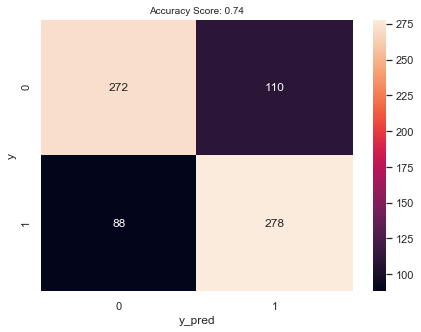

In [216]:
print(f'Support Vector Machine Confusion Matrix for Test Set:')
plot_confusion_matrix(y_test, y_test_pred)

In [217]:
print(f'Support Vector Machine Classification report for Test Set:')
print(classification_report(y_test, y_test_pred))

Support Vector Machine Classification report for Test Set:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       382
           1       0.72      0.76      0.74       366

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



##############################################################################################################

### Gaussian Naive Bayes Model Performance

##############################################################################################################

In [218]:
# Final model
print(f'Gaussian Naive Bayes:')
final_model = GaussianNB()
final_model.fit(X_train, y_train)

# Train Accuracy
y_train_pred = final_model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Train: {acc_train}')

# Test Accuracy
y_test_pred = final_model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Test: {acc_test}')

Gaussian Naive Bayes:
Accuracy Train: 0.7491638795986622
Accuracy Test: 0.733957219251337


Support Vector Machine Confusion Matrix for Train Set:


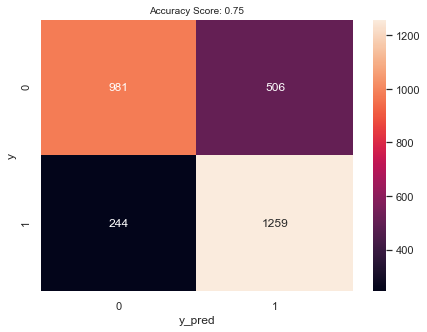

In [219]:
print(f'Support Vector Machine Confusion Matrix for Train Set:')
plot_confusion_matrix(y_train, y_train_pred)

Support Vector Machine Confusion Matrix for Test Set:


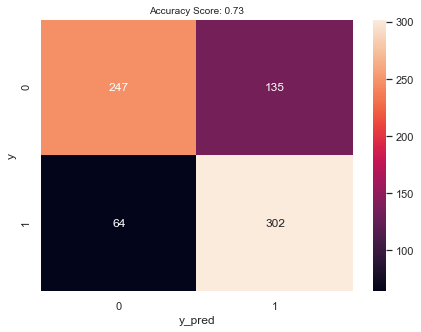

In [220]:
print(f'Support Vector Machine Confusion Matrix for Test Set:')
plot_confusion_matrix(y_test, y_test_pred)

In [221]:
print(f'Gaussian Naive Bayes Classification report for Test Set:')
print(classification_report(y_test, y_test_pred))

Gaussian Naive Bayes Classification report for Test Set:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       382
           1       0.69      0.83      0.75       366

    accuracy                           0.73       748
   macro avg       0.74      0.74      0.73       748
weighted avg       0.74      0.73      0.73       748

